# Hyper-parameters in Action!

## Circles Dataset

In [ ]:
# To run this notebook on Google Colab, you need to run these two commands first
# to install FFMPEG (to generate animations - it may take a while to install!)
# and the actual DeepReplay package

#!apt-get install ffmpeg
#!pip install deepreplay

In [1]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.optimizers import SGD
from keras.initializers import he_normal, normal

from deepreplay.callbacks import ReplayData
from deepreplay.replay import Replay
from deepreplay.plot import compose_animations, compose_plots

import matplotlib.pyplot as plt
from IPython.display import HTML
from sklearn.datasets import make_circles

%matplotlib inline

/home/dvgodoy/Programs/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Loads data and creates ReplayData callback

In [2]:
group_name = 'circles'

X, y = make_circles(n_samples=2000, random_state=27, noise=0.03)

replaydata = ReplayData(X, y, filename='circles_dataset.h5', group_name=group_name)

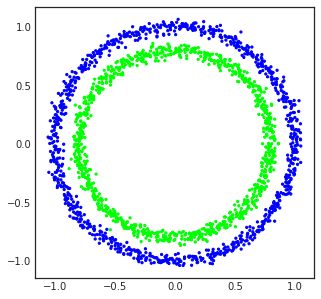

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(*X.transpose(), c=y, cmap=plt.cm.brg, s=5)

### Builds Keras model

In [4]:
sgd = SGD(lr=0.01)

he_initializer = he_normal(seed=42)
normal_initializer = normal(seed=42)

model = Sequential()
# 1st hidden layer with 5 units, taking the 2 features as inputs
model.add(Dense(input_dim=2,
                units=5,
                kernel_initializer=he_initializer))
# Activation as a separate layer, just for kicks - DeepReplay can handle it!
model.add(Activation('relu'))

# 2nd hidden layer with 3 units
model.add(Dense(units=3,
                kernel_initializer=he_initializer))
model.add(Activation('relu'))

# Typical output layer for binary classification
model.add(Dense(units=1,
                kernel_initializer=normal_initializer,
                activation='sigmoid',
                name='output'))

model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 15        
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
_________________________________________________________________
output (Dense)               (None, 1)                 4         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
None


### Trains the model using ReplayData as a callback to store the information

In [5]:
model.fit(X, y, epochs=200, batch_size=16, callbacks=[replaydata])

Epoch 1/200
2000/2000 [==============================] - 0s 141us/step - loss: 0.6926 - acc: 0.5195
Epoch 2/200
2000/2000 [==============================] - 0s 87us/step - loss: 0.6922 - acc: 0.5135
Epoch 3/200
2000/2000 [==============================] - 0s 86us/step - loss: 0.6919 - acc: 0.5210
Epoch 4/200
2000/2000 [==============================] - 0s 88us/step - loss: 0.6915 - acc: 0.5235
Epoch 5/200
2000/2000 [==============================] - 0s 89us/step - loss: 0.6912 - acc: 0.5205
Epoch 6/200
2000/2000 [==============================] - 0s 87us/step - loss: 0.6908 - acc: 0.5325
Epoch 7/200
2000/2000 [==============================] - 0s 85us/step - loss: 0.6905 - acc: 0.5275
Epoch 8/200
2000/2000 [==============================] - 0s 87us/step - loss: 0.6902 - acc: 0.5285
Epoch 9/200
2000/2000 [==============================] - 0s 86us/step - loss: 0.6899 - acc: 0.5270
Epoch 10/200
2000/2000 [==============================] - 0s 88us/step - loss: 0.6896 - acc: 0.5315
Epoch 11

2000/2000 [==============================] - 0s 85us/step - loss: 0.6218 - acc: 0.6775
Epoch 84/200
2000/2000 [==============================] - 0s 86us/step - loss: 0.6190 - acc: 0.6965
Epoch 85/200
2000/2000 [==============================] - 0s 86us/step - loss: 0.6162 - acc: 0.6970
Epoch 86/200
2000/2000 [==============================] - 0s 86us/step - loss: 0.6131 - acc: 0.7015
Epoch 87/200
2000/2000 [==============================] - 0s 86us/step - loss: 0.6102 - acc: 0.6910
Epoch 88/200
2000/2000 [==============================] - 0s 85us/step - loss: 0.6071 - acc: 0.7065
Epoch 89/200
2000/2000 [==============================] - 0s 84us/step - loss: 0.6036 - acc: 0.6885
Epoch 90/200
2000/2000 [==============================] - 0s 85us/step - loss: 0.6005 - acc: 0.7205
Epoch 91/200
2000/2000 [==============================] - 0s 84us/step - loss: 0.5971 - acc: 0.7010
Epoch 92/200
2000/2000 [==============================] - 0s 85us/step - loss: 0.5937 - acc: 0.7110
Epoch 93/200


2000/2000 [==============================] - 0s 90us/step - loss: 0.1157 - acc: 0.9955
Epoch 165/200
2000/2000 [==============================] - 0s 86us/step - loss: 0.1121 - acc: 0.9945
Epoch 166/200
2000/2000 [==============================] - 0s 92us/step - loss: 0.1095 - acc: 0.9950
Epoch 167/200
2000/2000 [==============================] - 0s 87us/step - loss: 0.1067 - acc: 0.9960
Epoch 168/200
2000/2000 [==============================] - 0s 85us/step - loss: 0.1044 - acc: 0.9955
Epoch 169/200
2000/2000 [==============================] - 0s 84us/step - loss: 0.1016 - acc: 0.9955
Epoch 170/200
2000/2000 [==============================] - 0s 87us/step - loss: 0.0995 - acc: 0.9945
Epoch 171/200
2000/2000 [==============================] - 0s 91us/step - loss: 0.0971 - acc: 0.9955
Epoch 172/200
2000/2000 [==============================] - 0s 87us/step - loss: 0.0945 - acc: 0.9960
Epoch 173/200
2000/2000 [==============================] - 0s 86us/step - loss: 0.0926 - acc: 0.9955
Epoc

### Builds figure to attach the plots to

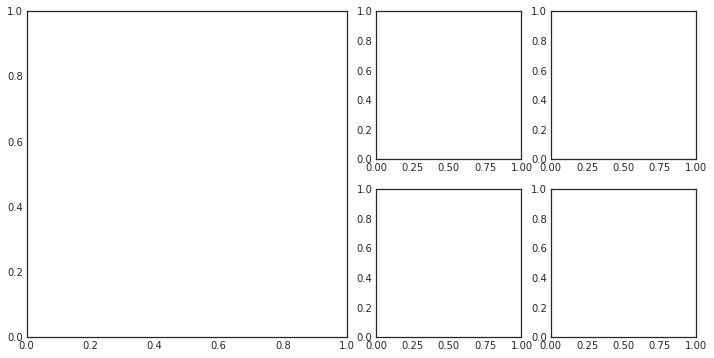

In [6]:
fig = plt.figure(figsize=(12, 6))
ax_fs = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
ax_ph_neg = plt.subplot2grid((2, 4), (0, 2))
ax_ph_pos = plt.subplot2grid((2, 4), (1, 2))
ax_lm = plt.subplot2grid((2, 4), (0, 3))
ax_lh = plt.subplot2grid((2, 4), (1, 3))

### Loads data into Replay and builds the plots

In [7]:
replay = Replay(replay_filename='circles_dataset.h5', group_name=group_name)

fs = replay.build_decision_boundary(ax_fs, xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))
ph = replay.build_probability_histogram(ax_ph_neg, ax_ph_pos)
lh = replay.build_loss_histogram(ax_lh)
lm = replay.build_loss_and_metric(ax_lm, 'acc')

### Plotting the figure for 280th epoch

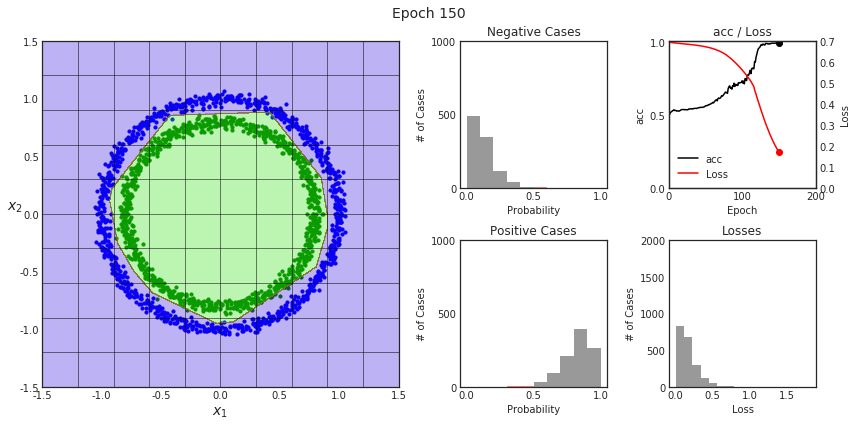

In [8]:
sample_figure = compose_plots([fs, ph, lm, lh], 150)
sample_figure

### Animating the plot

In [9]:
sample_anim = compose_animations([fs, ph, lm, lh])
HTML(sample_anim.to_html5_video())